In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
h = 0.01
x = np.arange(0.1, 1.1, h)
x_s = sym.Symbol('x')

In [3]:
def progressive_derivative(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)


In [4]:
def central_derivative(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)


In [5]:
def analytical_derivative(f, x):
    return sym.diff(f(x), x)

In [6]:
def f(x):
    return np.tan(np.sqrt(x))


In [7]:
def f_sym(x):
    return sym.tan(sym.sqrt(x))

In [8]:
teo_derivative = analytical_derivative(f_sym, x_s).simplify().subs(x_s, x)
teo_derivative = sym.lambdify(x_s, teo_derivative, 'numpy')
teo_derivative = teo_derivative(x)
progressive_derivative = progressive_derivative(f, x, h)
central_derivative = central_derivative(f, x, h)


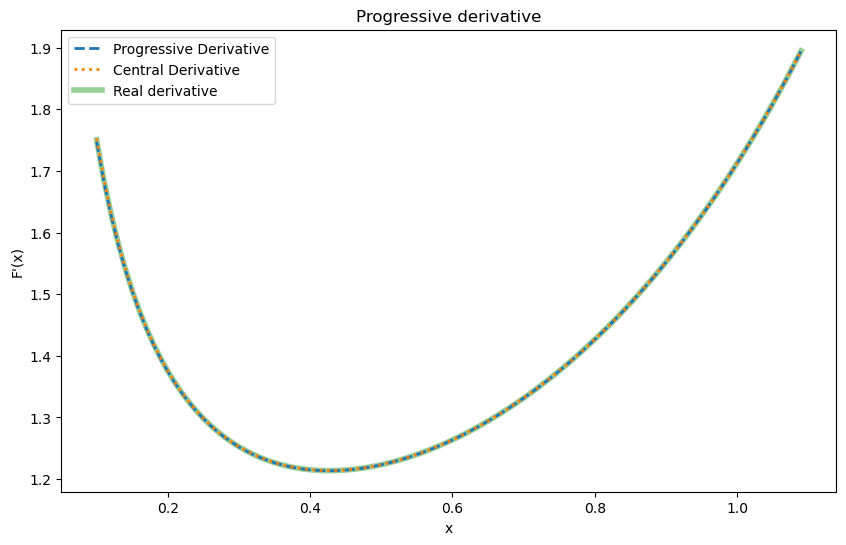

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.plot(x,
         progressive_derivative,
         label='Progressive Derivative',
         linestyle='--',
         linewidth=2)
plt.plot(x,
         central_derivative,
         label='Central Derivative',
         linestyle=':',
         linewidth=2)
plt.plot(x,
         teo_derivative,
         label='Real derivative',
         alpha=0.5,
         linewidth=4,
         zorder=0)
plt.legend()
plt.title('Progressive derivative')
plt.xlabel('x')
plt.ylabel("F'(x)")
plt.show()